In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading pre-processed data / Creating training and test data sets

In [3]:
data = pd.read_csv('cleaned_data.csv') # load cleaned data

In [4]:
data

,review,sentiment,lemmatization,stemming
0,one reviewers mentioned watching oz episode ho...,positive,reviewer mentioned oz episode hooked exactly h...,one review mention watch oz episod hook right ...
1,wonderful little production filming technique ...,positive,wonderful production filming technique unassum...,wonder littl product film techniqu unassum old...
2,thought wonderful way spend time hot summer we...,positive,wonderful spend hot summer weekend sitting air...,thought wonder way spend time hot summer weeke...
3,basically family little boy jake thinks zombie...,negative,basically family boy jake zombie closet parent...,basic famili littl boy jake think zombi closet...
4,petter mattei love time money visually stunnin...,positive,petter mattei money visually stunning mr matte...,petter mattei love time money visual stun film...
...,...,...,...,...
49577,thought movie right good job creative original...,positive,job creative original expecting whole lotta fu...,thought movi right good job creativ origin fir...
49578,bad plot bad dialogue bad acting idiotic direc...,negative,dialogue idiotic directing annoying porn groov...,bad plot bad dialogu bad act idiot direct anno...
49579,catholic taught parochial elementary schools n...,negative,catholic taught parochial elementary school nu...,cathol taught parochi elementari school nun ta...
49580,going disagree previous comment side maltin on...,negative,disagree previous comment side maltin second r...,go disagre previou comment side maltin one sec...


In [5]:
# mapping the sentiment as 0 for neg and 1 for positive
data['sentiment'] = data['sentiment'].map({'positive':1,'negative':0})

# Devide data to test and training data

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['lemmatization'], data["sentiment"], train_size = 0.75)


# Prepare TF - IDF

In [7]:
tf_vectorizer = TfidfVectorizer(min_df=2) # create Object of class TfidfVectorizer
#, min_df=5, max_df=0.3
X_train_tf = tf_vectorizer.fit_transform(X_train) # run method fit_transform on training set
X_test_tf = tf_vectorizer.transform(X_test)
print("n_samples: %d, n_features: %d" % X_train_tf.shape)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 37186, n_features: 46156
n_samples: 12396, n_features: 46156


# Prepare TF - IDF with limited number of words

In [96]:
tf_vectorizer2 = TfidfVectorizer(min_df=5,  max_df=0.2 ) # create Object of class TfidfVectorizer
#, min_df=5, max_df=0.3
X_train_tf2 = tf_vectorizer2.fit_transform(X_train) # run method fit_transform on training set
X_test_tf2 = tf_vectorizer2.transform(X_test)
 
print("n_samples: %d, n_features: %d" % X_train_tf2.shape)
print("n_samples: %d, n_features: %d" % X_test_tf2.shape)

 

n_samples: 37186, n_features: 28287
n_samples: 12396, n_features: 28287


In [58]:
X_test_tf2

<12396x28287 sparse matrix of type '<class 'numpy.float64'>'
	with 898223 stored elements in Compressed Sparse Row format>

# Prepare Count Vectorizer

In [10]:
count_vectorizer = CountVectorizer() # or term frequency
X_train_cv = count_vectorizer.fit_transform(X_train)
X_test_cv = count_vectorizer.transform(X_test)
print("n_samples: %d, n_features: %d" % X_train_cv.shape)
print("n_samples: %d, n_features: %d" % X_test_cv.shape)

n_samples: 37186, n_features: 81271
n_samples: 12396, n_features: 81271


#  Naives Bayes + TF-Idf

In [11]:
naive_bayes_classifier = MultinomialNB() # create object naive_bayes_classifier
naive_bayes_classifier.fit(X_train_tf, y_train) # run method fit from the class MultinomialNB
y_pred = naive_bayes_classifier.predict(X_test_tf)
 
 
 

In [12]:
#result Naive Bayes + TF-IDF

In [13]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print (cm)
print('------------------------------')


accuracy:   0.864
              precision    recall  f1-score   support

    Positive       0.86      0.88      0.87      6184
    Negative       0.87      0.85      0.86      6212

    accuracy                           0.86     12396
   macro avg       0.86      0.86      0.86     12396
weighted avg       0.86      0.86      0.86     12396

confusion matrix:
[[5411  773]
 [ 908 5304]]
------------------------------


In [14]:
cm1=confusion_matrix(y_test, y_pred)

#  Naives Bayes + Count Vector

In [15]:
naive_bayes_classifier = MultinomialNB() # create object naive_bayes_classifier
naive_bayes_classifier.fit(X_train_cv, y_train) # run method fit from the class MultinomialNB
y_pred = naive_bayes_classifier.predict(X_test_cv)
 
 
 

In [16]:
#result Naive Bayes + Count Vect

In [17]:

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm2 = metrics.confusion_matrix(y_test, y_pred)
print (cm2)

print('------------------------------')

 

accuracy:   0.860
              precision    recall  f1-score   support

    Positive       0.85      0.88      0.86      6184
    Negative       0.88      0.84      0.86      6212

    accuracy                           0.86     12396
   macro avg       0.86      0.86      0.86     12396
weighted avg       0.86      0.86      0.86     12396

confusion matrix:
[[5452  732]
 [ 998 5214]]
------------------------------


# Naives Bayes + TF-Idf limited 

In [59]:
naive_bayes_classifier2 = MultinomialNB() # create object naive_bayes_classifier
naive_bayes_classifier2.fit(X_train_tf2, y_train) # run method fit from the class MultinomialNB
y_pred = naive_bayes_classifier2.predict(X_test_tf2)
 
 
 

In [60]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')


accuracy:   0.860
              precision    recall  f1-score   support

    Positive       0.85      0.87      0.86      6184
    Negative       0.87      0.85      0.86      6212

    accuracy                           0.86     12396
   macro avg       0.86      0.86      0.86     12396
weighted avg       0.86      0.86      0.86     12396

confusion matrix:
[[5359  825]
 [ 912 5300]]
------------------------------


# KNeighborsClassifier . - TF idf


In [20]:
import matplotlib.pyplot as plt
import numpy

In [21]:
from sklearn.neighbors import KNeighborsClassifier

#Train Model and Predict
k = 8  #best Result
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_tf,y_train)


 

In [22]:
# predict the new document from the testing dataset
from sklearn.metrics import plot_confusion_matrix    
    
y_pred = neigh.predict(X_test_tf)

print("Accuracy of model at K=8 is",metrics.accuracy_score(y_test, y_pred))
    
    
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

 
 
    

Accuracy of model at K=8 is 0.7671022910616327
accuracy:   0.767
              precision    recall  f1-score   support

    Positive       0.77      0.75      0.76      6184
    Negative       0.76      0.78      0.77      6212

    accuracy                           0.77     12396
   macro avg       0.77      0.77      0.77     12396
weighted avg       0.77      0.77      0.77     12396

confusion matrix:
[[4665 1519]
 [1368 4844]]
------------------------------


# K means 1-10 TF- IDF 

In [23]:
# K von 1 bis 10 

In [24]:
error_rate = []
minR = 1 
maxR = 10
for i in range(minR, maxR):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf,y_train)
 pred_i = knn.predict(X_test_tf)
 error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.23289770893836723 at K = 8


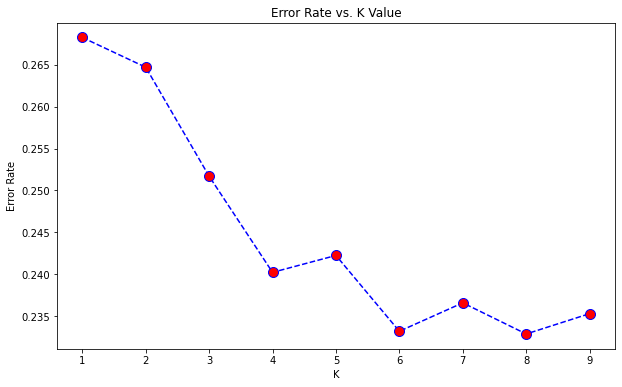

In [25]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate))+1)


<AxesSubplot:>

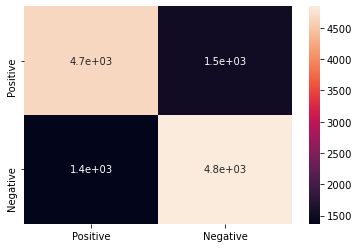

In [26]:

import seaborn as sns   
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=cm)


In [27]:
# K means 1-10 TF- IDF limited

In [66]:
error_rate = []
minR = 1 
maxR = 10
for i in range(minR, maxR):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf2,y_train)
 pred_i = knn.predict(X_test_tf2)
 error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.23668925459825751 at K = 6


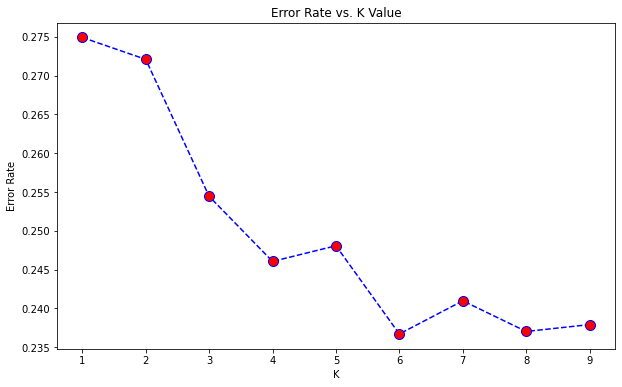

In [68]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate))+1)


In [30]:
# K means 1-10 CV 

In [63]:
error_rate = []
minR = 1 
maxR = 10
for i in range(minR, maxR):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_cv,y_train)
 pred_i = knn.predict(X_test_cv)
 error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.34551468215553405 at K = 9


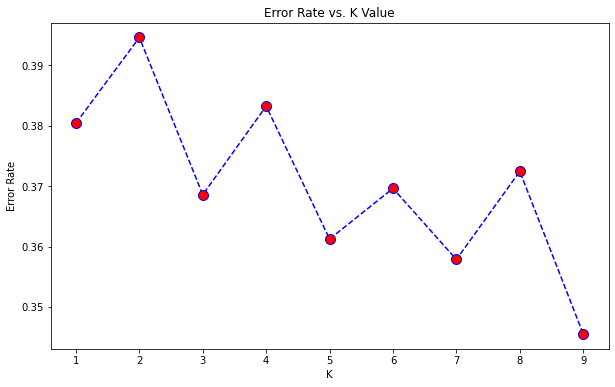

In [64]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate))+1)


# K means from 10 till 100 

In [34]:
error_rate = []
minR = 10 
maxR = 100
for i in range(10, 100, 10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf,y_train)
 pred_i = knn.predict(X_test_tf)
 error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.21200387221684414 at K = 7


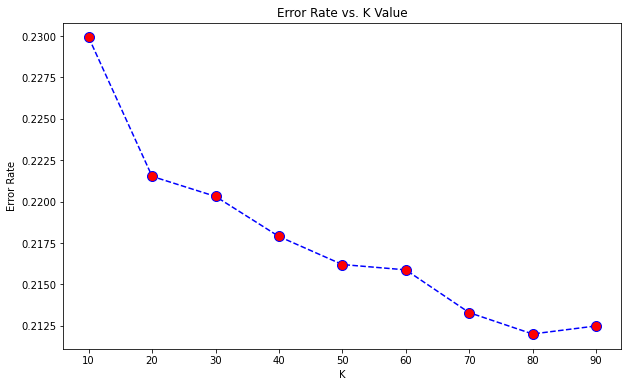

In [35]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR, 10)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate))+1)


# K Means from 100 to 1000

In [36]:
error_rate = []
minR = 100 
maxR = 10000
for i in range(100, 10000, 1000):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf,y_train)
 pred_i = knn.predict(X_test_tf)
 error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.17408841561794128 at K = 3


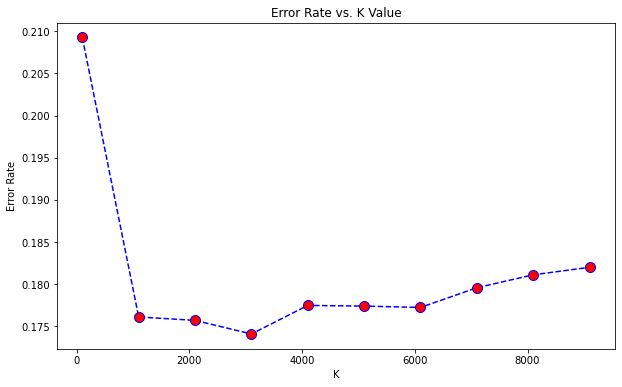

In [37]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR, 1000)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate))+1)


In [ ]:
# K Means from 3000 to 30000

In [38]:
error_rate = []
minR = 3000 
maxR = 30000
for i in range(minR, maxR, 3000):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf,y_train)
 pred_i = knn.predict(X_test_tf)
 error_rate.append(np.mean(pred_i != y_test))


ValueError: x and y must have same first dimension, but have shapes (1,) and (9,)

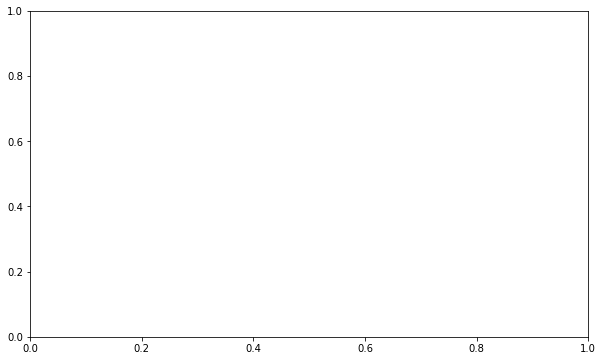

In [103]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR, 1000)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate))+1)


# Linear Support Vector Classification.

In [ ]:
# LinearSVC + Tf IDF

In [41]:
from sklearn.svm import LinearSVC
# predict the new document from the testing dataset
from sklearn.metrics import plot_confusion_matrix    
    
SVclassifier = LinearSVC()
SVclassifier.fit(X_train_tf, y_train)
y_pred = SVclassifier.predict(X_test_tf)

In [ ]:
#result LinearSVC + Tf IDF

In [42]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm2 = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

#import seaborn as sns   
#sns.heatmap(cm, annot=True)

accuracy:   0.883
              precision    recall  f1-score   support

    Positive       0.89      0.87      0.88      6184
    Negative       0.88      0.89      0.88      6212

    accuracy                           0.88     12396
   macro avg       0.88      0.88      0.88     12396
weighted avg       0.88      0.88      0.88     12396

confusion matrix:
[[4665 1519]
 [1368 4844]]
------------------------------


In [ ]:
#LinearSVC + Tf IDF limited

In [43]:
   
SVclassifier = LinearSVC()
SVclassifier.fit(X_train_tf2, y_train)
y_pred = SVclassifier.predict(X_test_tf2)

In [ ]:
#result LinearSVC + Tf IDF limited

accuracy:   0.882
              precision    recall  f1-score   support

    Positive       0.89      0.87      0.88      6184
    Negative       0.87      0.89      0.88      6212

    accuracy                           0.88     12396
   macro avg       0.88      0.88      0.88     12396
weighted avg       0.88      0.88      0.88     12396

confusion matrix:
[[5392  792]
 [ 670 5542]]
------------------------------


<AxesSubplot:>

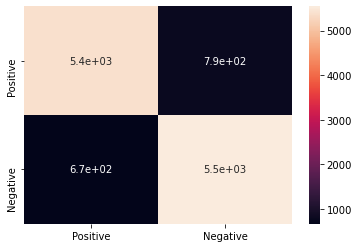

In [44]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

import seaborn as sns   
#sns.heatmap(cm, cmap="RdYlGn", annot=True)
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=cm)

# For presi


Text(0.5, 1.0, 'With SVCLinear Td-idf ')

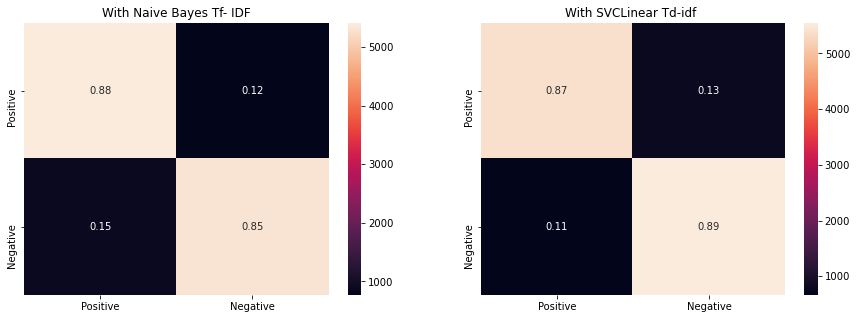

In [45]:
fig, axis = plt.subplots(1, 2, figsize=(15, 5))
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]


C1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
C2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]

sns.heatmap(ax = axis[0],data= cm1,annot=C1, xticklabels=x_axis_labels, yticklabels=y_axis_labels )
axis[0].set_title("With Naive Bayes Tf- IDF")

sns.heatmap(ax = axis[1],data=cm2,annot=C2,  xticklabels=x_axis_labels, yticklabels=y_axis_labels)
axis[1].set_title("With SVCLinear Td-idf ")




In [47]:
C1

array([[0.875     , 0.125     ],
       [0.14616871, 0.85383129]])

In [ ]:
# LinearSVC + Count Vect

In [46]:
SVclassifier = LinearSVC()
SVclassifier.fit(X_train_cv, y_train)
y_pred = SVclassifier.predict(X_test_cv)

C:\Users\CGosten\miniconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
#result LinearSVC + CV

In [50]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')
 

accuracy:   0.852
              precision    recall  f1-score   support

    Positive       0.85      0.85      0.85      6184
    Negative       0.85      0.86      0.85      6212

    accuracy                           0.85     12396
   macro avg       0.85      0.85      0.85     12396
weighted avg       0.85      0.85      0.85     12396

confusion matrix:
[[5247  937]
 [ 896 5316]]
------------------------------


#  SVM with the Radial Basis Function

In [49]:
from sklearn.svm import SVC
from sklearn import svm
rbf_svc = svm.SVC(kernel='rbf')

In [51]:
rbf_svc.fit(X_train_tf, y_train)
y_pred = rbf_svc.predict(X_test_tf)

accuracy:   0.890
              precision    recall  f1-score   support

    Positive       0.90      0.87      0.89      6184
    Negative       0.88      0.91      0.89      6212

    accuracy                           0.89     12396
   macro avg       0.89      0.89      0.89     12396
weighted avg       0.89      0.89      0.89     12396

confusion matrix:
[[5406  778]
 [ 583 5629]]
------------------------------


<AxesSubplot:>

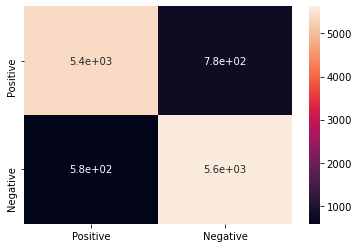

In [52]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

import seaborn as sns   
#sns.heatmap(cm, cmap="RdYlGn", annot=True)
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=cm)

# Just SVC


In [53]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
# SVC + Tf IDF

In [54]:
SVCclassifier = SVC()
     
SVCclassifier.fit(X_train_tf, y_train)
y_pred = SVCclassifier.predict(X_test_tf)


accuracy:   0.890
              precision    recall  f1-score   support

    Positive       0.90      0.87      0.89      6184
    Negative       0.88      0.91      0.89      6212

    accuracy                           0.89     12396
   macro avg       0.89      0.89      0.89     12396
weighted avg       0.89      0.89      0.89     12396

confusion matrix:
[[5406  778]
 [ 583 5629]]
------------------------------


<AxesSubplot:>

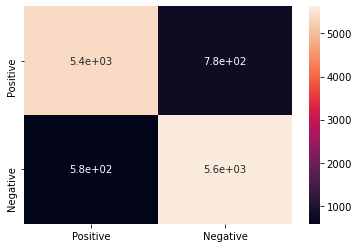

In [55]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

import seaborn as sns   
#sns.heatmap(cm, cmap="RdYlGn", annot=True)
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=cm)

# LogisticRegression

#TF - IDF limited

In [99]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_tf, y_train)
y_pred = clf.predict(X_test_tf)

accuracy:   0.886
              precision    recall  f1-score   support

    Positive       0.90      0.87      0.88      6184
    Negative       0.87      0.90      0.89      6212

    accuracy                           0.89     12396
   macro avg       0.89      0.89      0.89     12396
weighted avg       0.89      0.89      0.89     12396

confusion matrix:
[[5381  803]
 [ 613 5599]]
------------------------------


<AxesSubplot:>

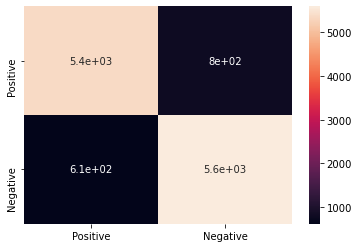

In [100]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

import seaborn as sns   
#sns.heatmap(cm, cmap="RdYlGn", annot=True)
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=cm)

In [101]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_tf2, y_train)
y_pred = clf.predict(X_test_tf2)

accuracy:   0.885
              precision    recall  f1-score   support

    Positive       0.90      0.87      0.88      6184
    Negative       0.87      0.90      0.89      6212

    accuracy                           0.89     12396
   macro avg       0.89      0.89      0.89     12396
weighted avg       0.89      0.89      0.89     12396

confusion matrix:
[[5379  805]
 [ 619 5593]]
------------------------------


<AxesSubplot:>

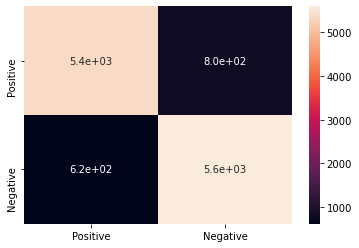

In [102]:
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

import seaborn as sns   
#sns.heatmap(cm, cmap="RdYlGn", annot=True)
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]
sns.heatmap(cm, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=cm)